In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
from math import sqrt
from pathlib import Path
import json
from heapq import heapify, heappush, heappop

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import numpy as np
from scipy import signal
from skimage.graph import route_through_array

import rasterio

from IPython.display import display, Markdown

from gridfinder._util import save_raster
from gridfinder import gridfinder as gf

# skimage basic example
http://scikit-image.org/docs/dev/api/skimage.graph.html

In [ ]:
image = np.array([[1,  1,   1,   1,   3],
                  [1,  1,   1,   0.5, 0.1],
                  [1,  1,   1,   0.5, 0.1],
                  [1,  1,   0.5, 1,   0.1],
                  [2,  0.5, 0.1,   0.1,   0.1]])
image

In [ ]:
plt.imshow(image, cmap='pink')

In [ ]:
# image[row, col]
image[4,0], image[0,4]

In [ ]:
indices, weight = route_through_array(image, [4, 0], [0, 4], fully_connected=True, geometric=True)
indices, weight

In [ ]:
indices = np.array(indices).T
path = np.zeros_like(image)
path[indices[0], indices[1]] = 1
path

In [ ]:
plt.imshow(path, cmap='pink')

# Convert targets to list of coordinates

In [14]:
targets_in = Path('tanzania/ntl.tif')
costs_in = Path('tanzania/roads_raster.tif')

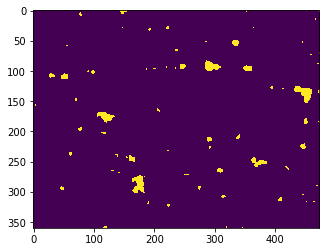

In [11]:
targets, transform, start = gf.get_targets(targets_in)
plt.imshow(targets, cmap='viridis')

In [13]:
start

(0, 143)

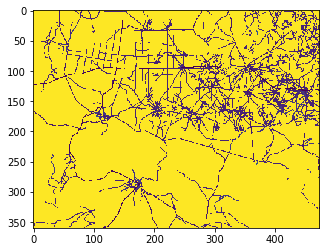

In [17]:
costs = gf.get_costs(costs_in)
plt.imshow(costs, cmap='viridis')

# Test targets and roads data

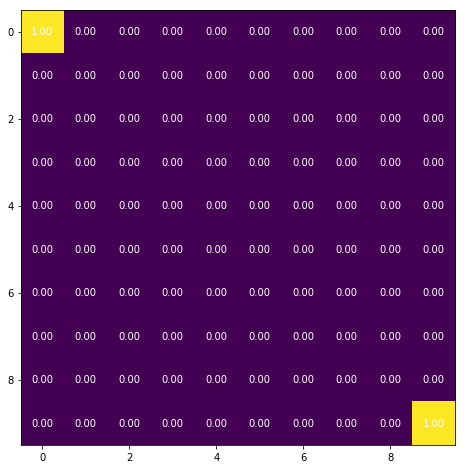

In [22]:
targets_test = np.zeros((10, 10))
targets_test[0, 0] = 1
targets_test[9, 9] = 1

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(targets_test, cmap='viridis')
for (j,i),label in np.ndenumerate(targets_test):
    ax.text(i,j,f'{label:.2f}',ha='center',va='center', color='white')

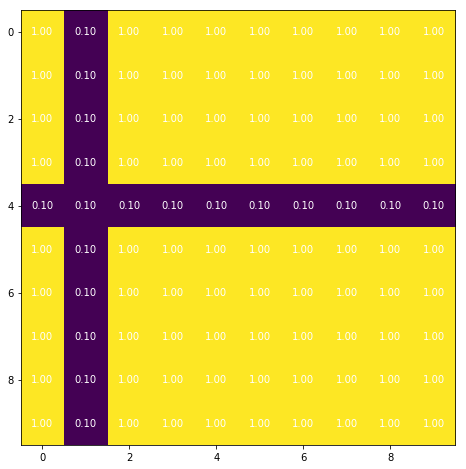

In [25]:
costs_test = np.ones_like(targets_test)
costs_test[:,1] = 0.1
costs_test[4,:] = 0.1

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(costs_test, cmap='viridis')
for (j,i),label in np.ndenumerate(costs_test):
    ax.text(i,j,f'{label:.2f}',ha='center',va='center', color='white')

In [24]:
start_test = (0,0)

# Check neighbours

In [27]:
dist, prev, visited = gf.optimise(targets_test, costs_test, start_test)

#dist, prev, visited = djikstra(targets, costs, start)

'98/100'

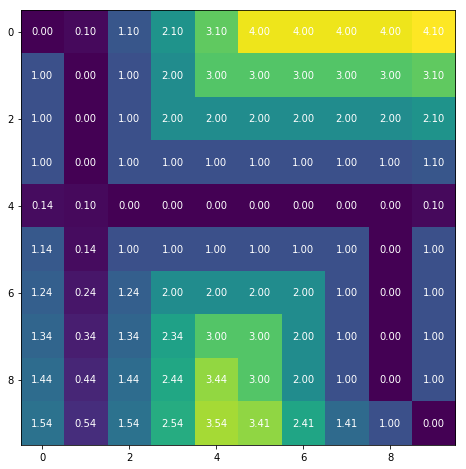

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(dist, cmap='viridis')
for (j,i),label in np.ndenumerate(dist):
    ax.text(i,j,f'{label:.2f}',ha='center',va='center', color='white')

In [29]:
#save_raster('tanzania/dists_more.tif', dist, transform)